# A linear regression model using tensorflow keras api

Inport necessary libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-11-11 18:02:19.227441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731326539.246234   47609 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731326539.251319   47609 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 18:02:19.271673: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Create features

In [3]:
x = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
print(x)

[ 1  3  5  7  9 11 13 15 17 19]


Create labels

In [4]:
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(y)

[ 1  2  3  4  5  6  7  8  9 10]


Plot labels vs features

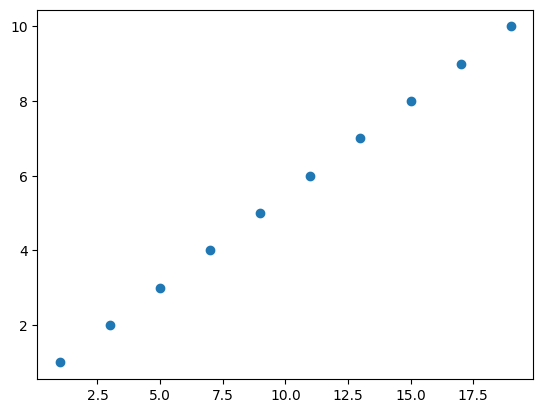

In [5]:
plt.scatter(x, y)

Check the theoretical correlation

In [6]:
x == 2 * y - 1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Convert numpy arrays into tensors

In [7]:
# Use explicit type casting to float32
x = tf.cast(tf.constant(x), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

x, y

I0000 00:00:1731326542.488352   47609 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4273 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)>)

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer"),
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
epochs = 15

history = model.fit(x, y, epochs=epochs)

Epoch 1/15


I0000 00:00:1731326721.542709   48394 service.cc:148] XLA service 0x7ca7880077a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731326721.542745   48394 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-11-11 18:05:21.560364: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731326721.625677   48394 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-11 18:05:21.674616: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.2860 - mae: 10.0086  

I0000 00:00:1731326721.842667   48394 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 8.9789 - mae: 8.9789
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1548 - mae: 6.1548
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8490 - mae: 5.8490
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1636 - mae: 2.1636
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0708 - mae: 4.0708
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5239 - mae: 3.5239
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6062 - mae: 1.6062
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2586 - mae: 3.2586
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4177 - mae: 3.4177
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4457 - mae: 1.4457
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4405 - mae: 2.4405
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7386 - mae: 2.7386
Epoch 13/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8342 - mae: 1.8342
Epoch

Make a bigger dataset

In [11]:
# Make hundreds of features
x = tf.range(-100, 100, 2)
x

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
         54,   56,   58,   60,   62,   64,   66,   68,   70,   72,   74,
         76,   78,   80,   82,   84,   86,   88,   90,   92,   94,   96,
         98], dtype=int32)>

In [12]:
# Make labels from those features
y = (x + 1) / 2
y

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([-49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5,
       -40.5, -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5,
       -31.5, -30.5, -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5,
       -22.5, -21.5, -20.5, -19.5, -18.5, -17.5, -16.5, -15.5, -14.5,
       -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,  -7.5,  -6.5,  -5.5,
        -4.5,  -3.5,  -2.5,  -1.5,  -0.5,   0.5,   1.5,   2.5,   3.5,
         4.5,   5.5,   6.5,   7.5,   8.5,   9.5,  10.5,  11.5,  12.5,
        13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,  20.5,  21.5,
        22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,  30.5,
        31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5,
        40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,
        49.5])>

Plot the newly created dataset

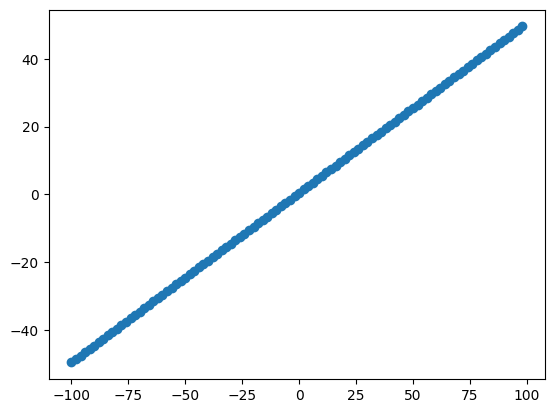

In [13]:
plt.scatter(x, y)

Split training and validation data

In [14]:
x_train, y_train = x[:80], y[:80]
x_valid, y_valid = x[80:], y[80:]

len(x_train), len(x_valid), len(y_train), len(y_valid)

(80, 20, 80, 20)

Visualize the data

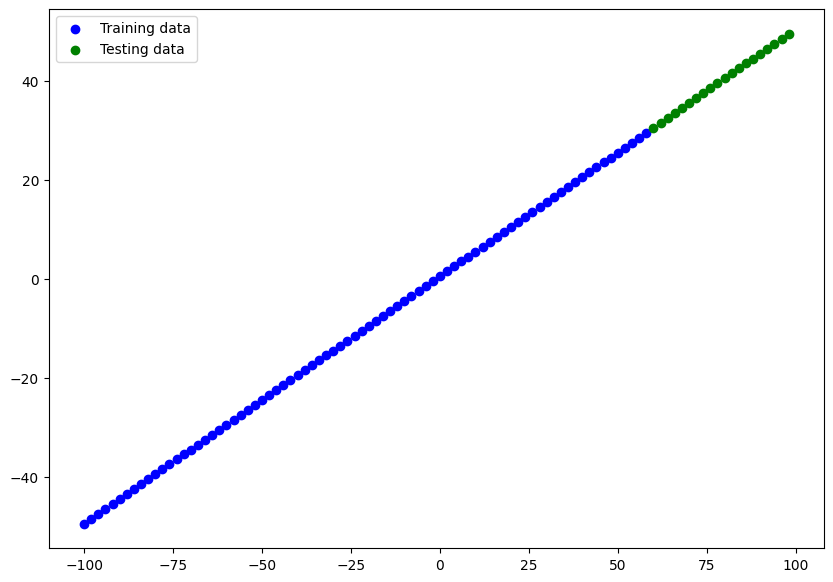

In [15]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(x_valid, y_valid, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend()

In [18]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=epochs)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 1.8036 - mae: 1.8036 - val_loss: 1.3131 - val_mae: 1.3131
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9376 - mae: 0.9376 - val_loss: 0.8605 - val_mae: 0.8605
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5924 - mae: 0.5924 - val_loss: 2.0481 - val_mae: 2.0481
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0241 - mae: 1.0241 - val_loss: 2.4727 - val_mae: 2.4727
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3255 - mae: 1.3255 - val_loss: 0.3846 - val_mae: 0.3846
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3184 - mae: 0.3184 - val_loss: 0.2496 - val_mae: 0.2496
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2761 - mae: 0.2761 - val_loss: 0.1388 - val_mae: 0.1388
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3513 - mae: 0.3513 - val_loss: 1.3625 - val_mae: 1.3625
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5749 - mae: 0.5749 -

In [19]:
# Make some predictions
y_pred = model.predict(x_valid)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[31.188755],
       [32.21127 ],
       [33.233784],
       [34.256294],
       [35.27881 ],
       [36.301323],
       [37.323837],
       [38.346344],
       [39.36886 ],
       [40.391373],
       [41.41388 ],
       [42.436398],
       [43.45891 ],
       [44.481422],
       [45.503937],
       [46.526443],
       [47.54896 ],
       [48.571476],
       [49.593983],
       [50.616497]], dtype=float32)

Plot the real values alongside the predicted values

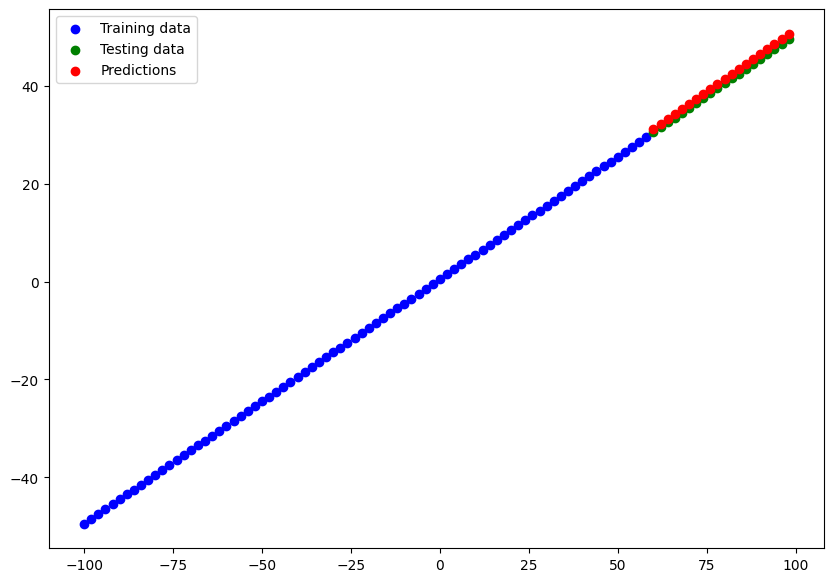

In [20]:
# Let's create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_valid,
                     test_labels=y_valid,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()
     

plot_predictions(train_data=x_train,
                train_labels=y_train,
                test_data=x_valid,
                test_labels=y_valid,
                predictions=y_pred)

Calculate errors

In [30]:
mae = tf.math.reduce_mean(tf.math.abs(y_valid - y_pred) / y_valid)
mae

<tf.Tensor: shape=(), dtype=float64, numpy=0.17556182027149947>

In [31]:
def mae(y_true, y_pred):
  return tf.math.reduce_mean(tf.math.abs(y_true - y_pred))

def mre(y_true, y_pred):
  return tf.math.reduce_mean(tf.math.abs(y_true - y_pred) / y_true)

In [32]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_2")

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

/media/rayat69/Essentials/Programming/python/dl-1/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
epochs = 50

history = model_2.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=epochs)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - loss: 12.7117 - mae: 12.7117 - val_loss: 5.5471 - val_mae: 5.5471
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.2427 - mae: 2.2427 - val_loss: 6.7411 - val_mae: 6.7411
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.4439 - mae: 4.4439 - val_loss: 3.2116 - val_mae: 3.2116
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.9197 - mae: 1.9197 - val_loss: 4.9264 - val_mae: 4.9264
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.5584 - mae: 2.5584 - val_loss: 4.6229 - val_mae: 4.6229
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.9000 - mae: 1.9000 - val_loss: 1.3038 - val_mae: 1.3038
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3127 - mae: 1.3127 - val_loss: 1.5186 - val_mae: 1.5186
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9311 - mae: 0.9311 - val_loss: 2.5687 - val_mae: 2.5687
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3018 - mae: 1.3018

In [34]:
y_pred = model_2.predict(x_valid)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([[29.656294],
       [30.628292],
       [31.60029 ],
       [32.57228 ],
       [33.54428 ],
       [34.51627 ],
       [35.488274],
       [36.46027 ],
       [37.432266],
       [38.40426 ],
       [39.376263],
       [40.348255],
       [41.320248],
       [42.29225 ],
       [43.26425 ],
       [44.23624 ],
       [45.20824 ],
       [46.180237],
       [47.152237],
       [48.12422 ]], dtype=float32)

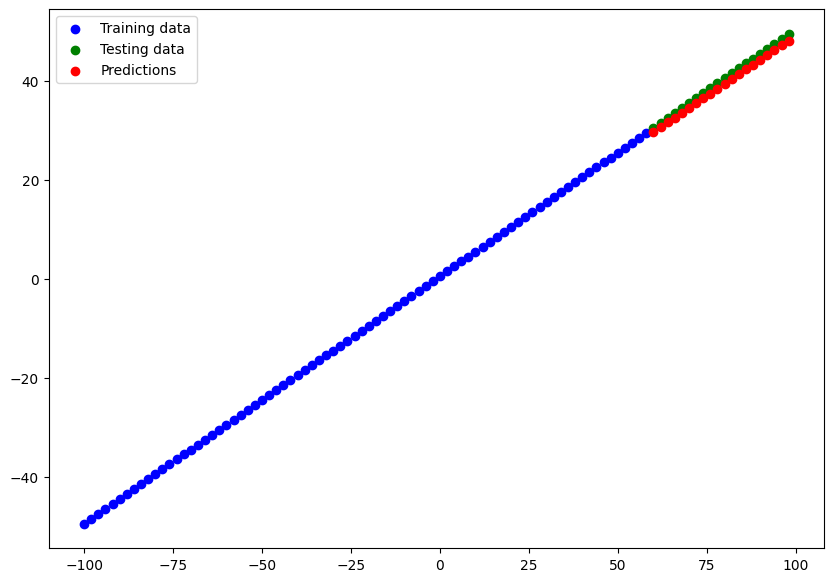

In [35]:
plot_predictions(train_data=x_train,
                train_labels=y_train,
                test_data=x_valid,
                test_labels=y_valid,
                predictions=y_pred)

In [36]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_3")

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

/media/rayat69/Essentials/Programming/python/dl-1/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
epochs = 50

history = model_3.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=epochs)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - loss: 4.5078 - mae: 4.5078 - val_loss: 0.0752 - val_mae: 0.0752
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4304 - mae: 1.4304 - val_loss: 3.8045 - val_mae: 3.8045
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4553 - mae: 1.4553 - val_loss: 1.8303 - val_mae: 1.8303
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9875 - mae: 0.9875 - val_loss: 0.2574 - val_mae: 0.2574
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3168 - mae: 0.3168 - val_loss: 1.0478 - val_mae: 1.0478
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5613 - mae: 0.5613 - val_loss: 2.9589 - val_mae: 2.9589
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3596 - mae: 1.3596 - val_loss: 2.1027 - val_mae: 2.1027
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2100 - mae: 1.2100 - val_loss: 1.8230 - val_mae: 1.8230
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8191 - mae: 0.8191 -

In [42]:
y_pred = model_3.predict(x_valid)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[29.251205],
       [30.209688],
       [31.168169],
       [32.12665 ],
       [33.085133],
       [34.043617],
       [35.002098],
       [35.96058 ],
       [36.919064],
       [37.877544],
       [38.83603 ],
       [39.79451 ],
       [40.75299 ],
       [41.71147 ],
       [42.669952],
       [43.628433],
       [44.58692 ],
       [45.545403],
       [46.503883],
       [47.46236 ]], dtype=float32)

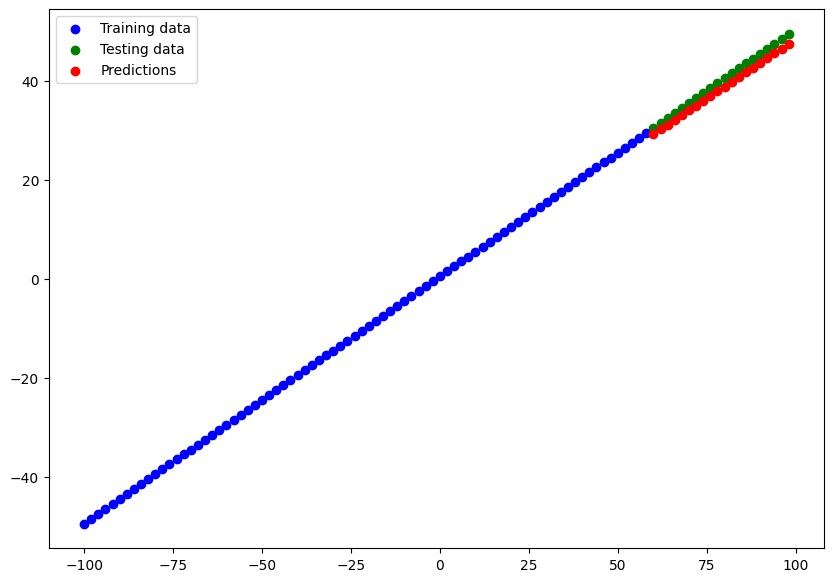

In [43]:
plot_predictions(train_data=x_train,
                train_labels=y_train,
                test_data=x_valid,
                test_labels=y_valid,
                predictions=y_pred)

In [41]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_4")

model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

In [44]:
epochs = 50

history = model_4.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=epochs)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 704ms/step - loss: 23.4506 - mae: 23.4506 - val_loss: 7.5365 - val_mae: 7.5365
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.5359 - mae: 13.5359 - val_loss: 42.7704 - val_mae: 42.7704
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 19.3906 - mae: 19.3906 - val_loss: 21.1537 - val_mae: 21.1537
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.1854 - mae: 13.1854 - val_loss: 7.3554 - val_mae: 7.3554
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.4944 - mae: 5.4944 - val_loss: 15.4624 - val_mae: 15.4624
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.9412 - mae: 7.9412 - val_loss: 2.2497 - val_mae: 2.2497
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.1249 - mae: 4.1249 - val_loss: 2.7515 - val_mae: 2.7515
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.5212 - mae: 3.5212 - val_loss: 4.2577 - val_mae: 4.2577
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.0096 -

In [48]:
y_pred = model_4.predict(x_valid)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([[ 7.5607166],
       [ 7.8127403],
       [ 8.064764 ],
       [ 8.316788 ],
       [ 8.568811 ],
       [ 8.820837 ],
       [ 9.072857 ],
       [ 9.324881 ],
       [ 9.576906 ],
       [ 9.82893  ],
       [10.080952 ],
       [10.3329735],
       [10.584997 ],
       [10.837021 ],
       [11.0890465],
       [11.34107  ],
       [11.593098 ],
       [11.845121 ],
       [12.097145 ],
       [12.349171 ]], dtype=float32)

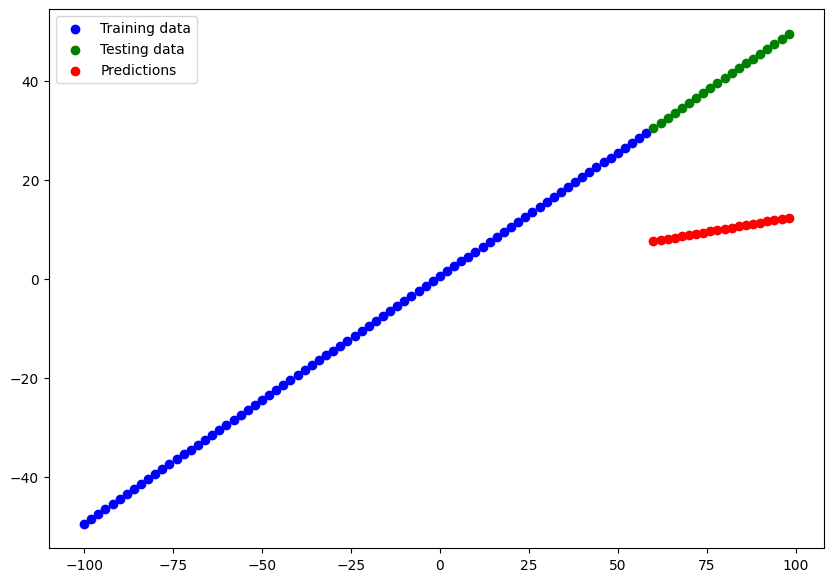

In [49]:
plot_predictions(train_data=x_train,
                train_labels=y_train,
                test_data=x_valid,
                test_labels=y_valid,
                predictions=y_pred)

In [54]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_4")

model_5.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

In [55]:
epochs = 100

history = model_5.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=epochs)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - loss: 49.1371 - mae: 49.1371 - val_loss: 84.0261 - val_mae: 84.0261
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 47.9889 - mae: 47.9889 - val_loss: 82.0870 - val_mae: 82.0870
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 46.8581 - mae: 46.8581 - val_loss: 80.1544 - val_mae: 80.1544
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 45.7312 - mae: 45.7312 - val_loss: 78.2257 - val_mae: 78.2257
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 44.6066 - mae: 44.6066 - val_loss: 76.3000 - val_mae: 76.3000
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 43.4838 - mae: 43.4838 - val_loss: 74.3770 - val_mae: 74.3770
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 42.3627 - mae: 42.3627 - val_loss: 72.4566 - val_mae: 72.4566
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 41.2431 - mae: 41.2431 - val_loss: 70.5388 - val_mae: 70.5388
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s

In [56]:
y_pred = model_5.predict(x_valid)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[30.437716],
       [31.43558 ],
       [32.43345 ],
       [33.431316],
       [34.42918 ],
       [35.427048],
       [36.424915],
       [37.42278 ],
       [38.42065 ],
       [39.418507],
       [40.416363],
       [41.414238],
       [42.4121  ],
       [43.409973],
       [44.407837],
       [45.405704],
       [46.403576],
       [47.401432],
       [48.399296],
       [49.397167]], dtype=float32)

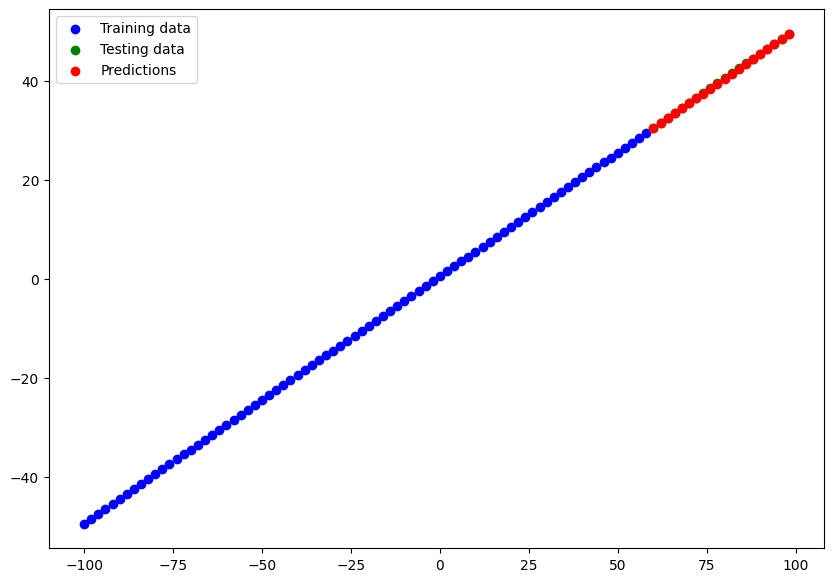

In [57]:
plot_predictions(train_data=x_train,
                train_labels=y_train,
                test_data=x_valid,
                test_labels=y_valid,
                predictions=y_pred)

In [59]:
model_5.save("./models/lin_regress.keras")